# Li-Daie-2016 - A DataJoint example
The data and results presented in this notebook pertain to the paper:

>Nuo Li, Kayvon Daie, Karel Svoboda & Shaul Druckmann. "Robust neuronal dynamics in premotor cortex during motor planning" (2016) Nature (https://dx.doi.org/10.1038/nature17643)

This notebook provide demonstrations of working with a DataJoint data pipeline in querying data, apply data conditioning and reproduce some key figures in the paper. The orignal data , in NWB 2.0 format, had been ingested into a DataJoint data pipeline (data pipeline schema is given below). As a validation of complete ingestion of the original data into DataJoint, figures 2b, 2c, and extended figure 2 will be reproduced in this example.

In [10]:
import datajoint as dj
dj.conn().connect()

In [11]:
%matplotlib inline
import os
os.chdir('..')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, psth
from pipeline.plot import unit_characteristic_plot, unit_psth

In [12]:
import warnings
warnings.filterwarnings('ignore')

##  Firing rate change from control induced by photoinhibition - Figure 1

In [13]:
subjects = lab.Subject & [{'subject_id': 255200},
                          {'subject_id': 255203},
                          {'subject_id': 255201},
                          {'subject_id': 257772},
                          {'subject_id': 258250}]

In [14]:
units = ephys.Unit & psth.UnitPsth & subjects

In [15]:
units

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,electrode_group electrode group,electrode electrode,"unit_posx (um) estimated x position of the unit relative to probe's (0,0)","unit_posy (um) estimated y position of the unit relative to probe's (0,0)",spike_times (s) from the start of the first data point used in clustering,unit_amp,unit_snr,waveform spike waveform (#spike x #time)
255200,1,1,manual,1,None,good,A4x8-5mm-100-200-177,silicon32,0,1,300.0,760189.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,2,None,good,A4x8-5mm-100-200-177,silicon32,0,22,-100.0,759689.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,3,None,good,A4x8-5mm-100-200-177,silicon32,0,24,-100.0,759489.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,4,None,good,A4x8-5mm-100-200-177,silicon32,0,23,-100.0,759589.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,5,None,good,A4x8-5mm-100-200-177,silicon32,0,29,-300.0,759789.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,6,None,good,A4x8-5mm-100-200-177,silicon32,0,25,-300.0,760189.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,7,None,good,A4x8-5mm-100-200-177,silicon32,0,27,-300.0,759989.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,8,None,good,A4x8-5mm-100-200-177,silicon32,0,28,-300.0,759889.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,9,None,good,A4x8-5mm-100-200-177,silicon32,0,30,-300.0,759689.0,=BLOB=,nan,nan,=BLOB=
255200,1,1,manual,12,None,good,A4x8-5mm-100-200-177,silicon32,0,11,100.0,759989.0,=BLOB=,nan,nan,=BLOB=


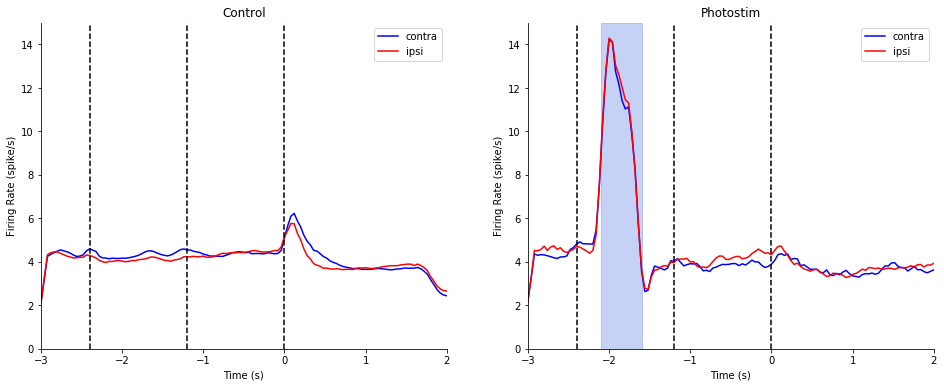

In [16]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'sample'])

Found multiple stim durations: [0.5 0.8] - select 0.5


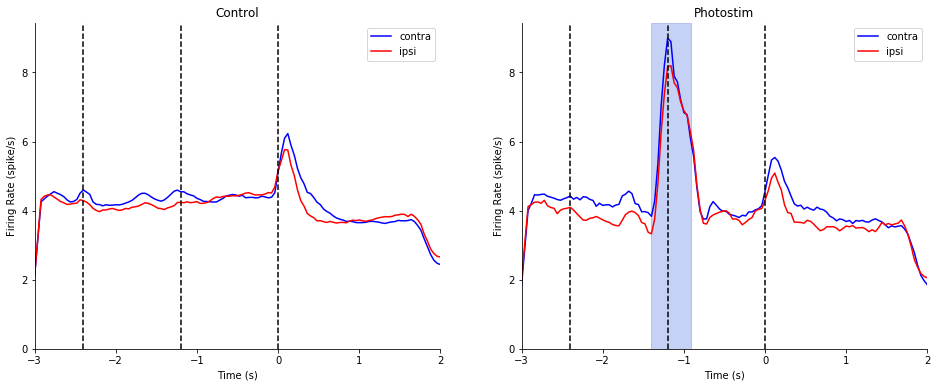

In [17]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'early_delay'])

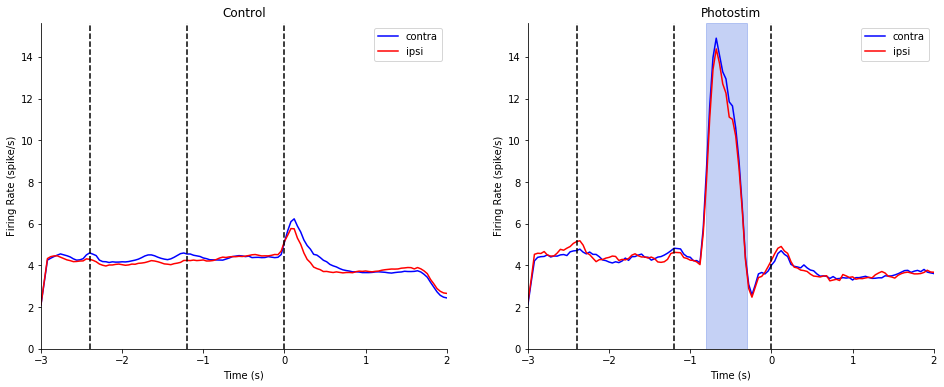

In [18]:
unit_characteristic_plot.plot_psth_photostim_effect(units, ['left_alm', 'middle_delay'])

# Plot single-unit spikes and PSTH 
Under left-ALM photostim effect in `Sample`, `Early delay` and `Middle delay`

In [19]:
unit_keys = (units & experiment.PhotostimEvent).fetch('KEY')

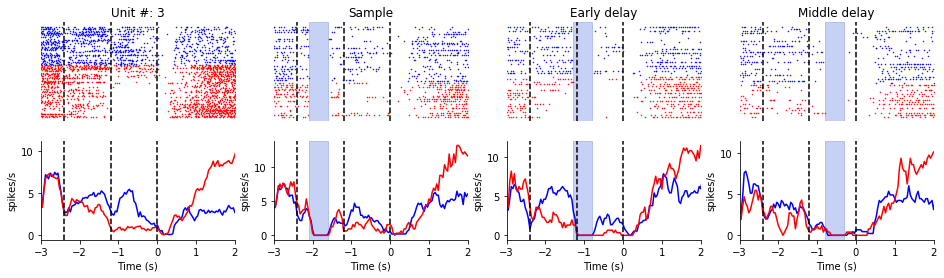

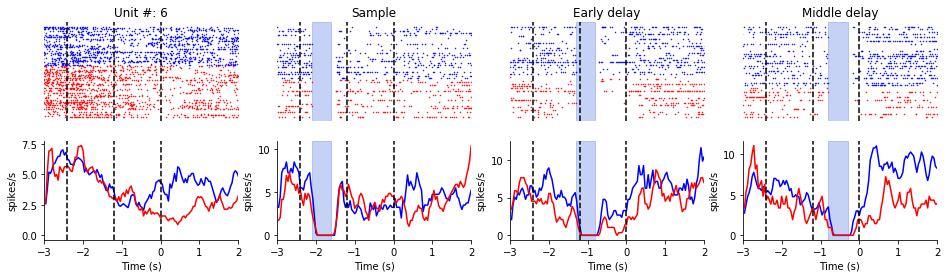

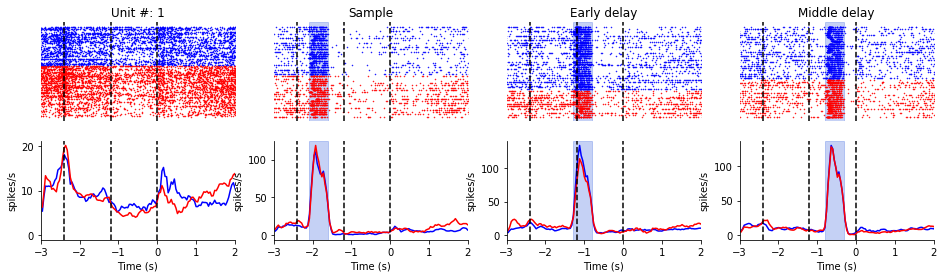

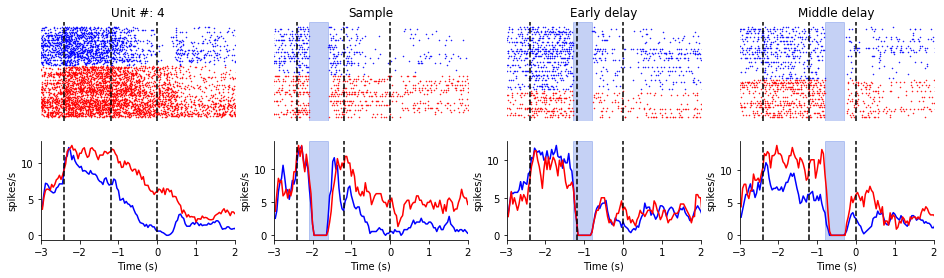

In [46]:
for unit in [unit_keys[k] for k in [2, 5, 12, 15]]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                              ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                             ('', 'Sample', 'Early delay', 'Middle delay')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

# Plot single-unit spikes and PSTH 
Under ALM photostim effect in `Early delay` at `Ipsilateral`, `Contralateral` and `Bilateral`

First, find the units from sessions that underwent photostim at `left`, `right`, and `bilateral` ALM

In [111]:
left_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "left_alm"')
right_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "right_alm"')
both_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "both_alm"')

In [119]:
unit_keys = (left_alm_stim_units * right_alm_stim_units * both_alm_stim_units).fetch('KEY')

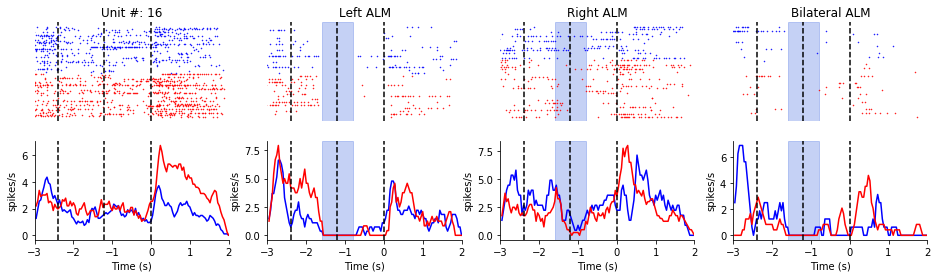

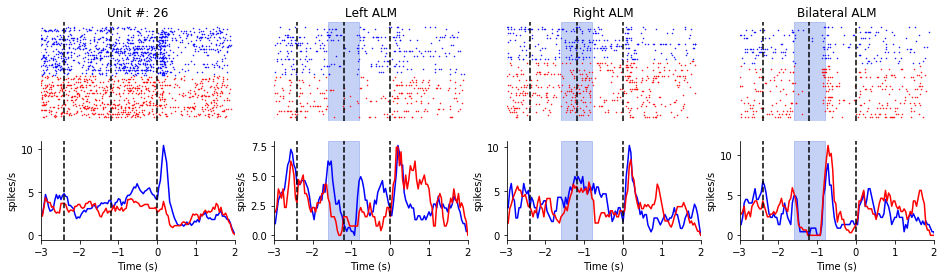

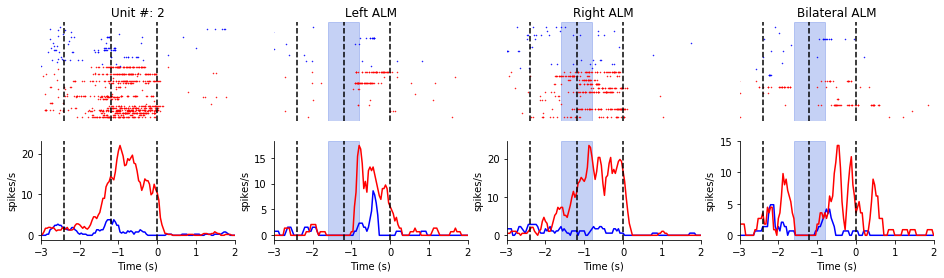

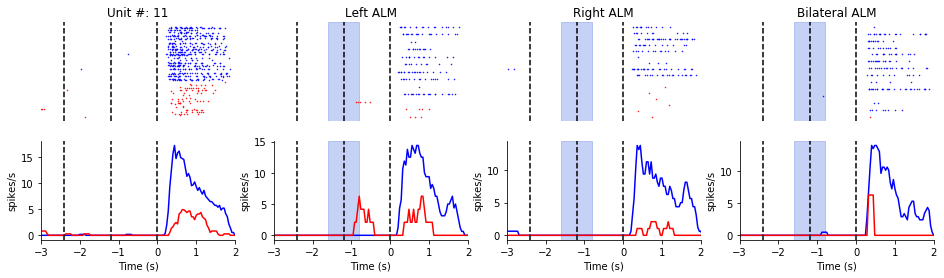

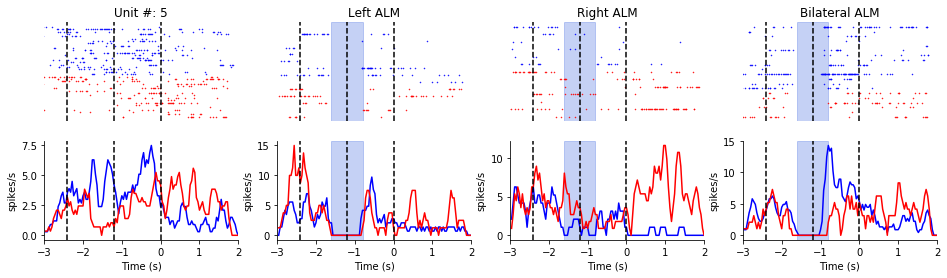

In [131]:
for unit in [unit_keys[k] for k in np.random.randint(len(unit_keys), size=(5,))]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'early_delay'],
                              ['right_alm', 'early_delay'], ['both_alm', 'early_delay']), 
                             ('', 'Left ALM', 'Right ALM', 'Bilateral ALM')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

# Plot population PSTH - with selectivity

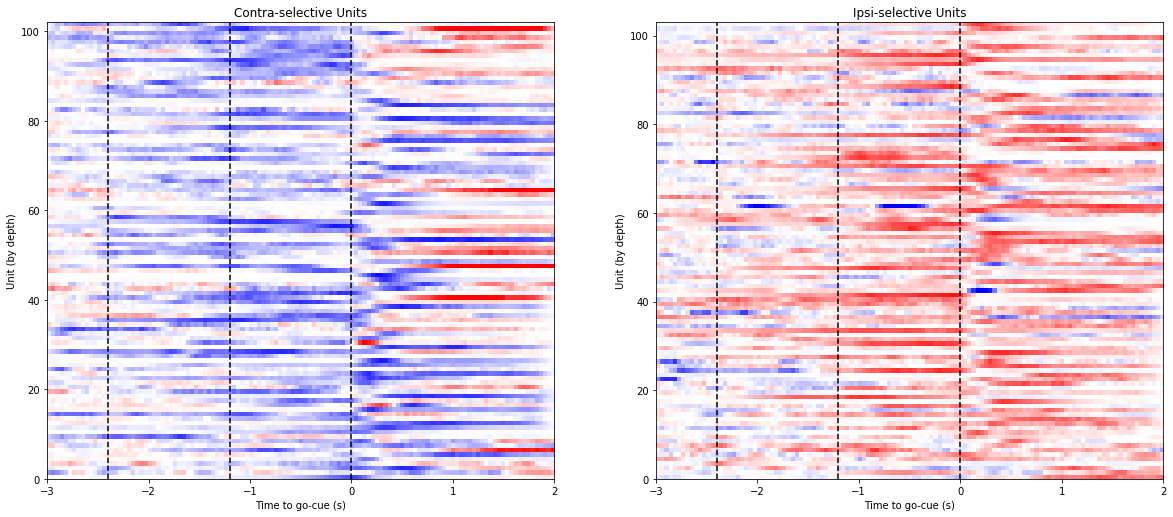

In [49]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(units)

# =====================================================

In [48]:
import importlib
importlib.reload(unit_characteristic_plot)
importlib.reload(unit_psth)

<module 'pipeline.plot.unit_psth' from 'C:\\Users\\thinh\\Documents\\TN-Vathes\\NWB_Janelia\\Li-2015a\\pipeline\\plot\\unit_psth.py'>